In [1]:
import os
import glob
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
data_dir = pathlib.Path(os.environ["DATA_DIR"])

In [3]:
inputs = glob.glob(str(data_dir / "topolymer/processed/cubic_phom/r-5_l-10_frac-0.20*"))

In [4]:
dataset = inputs[0]
data = np.load(dataset, allow_pickle=True)

betti_a_0
betti_b_0
betti_a_1
betti_b_1


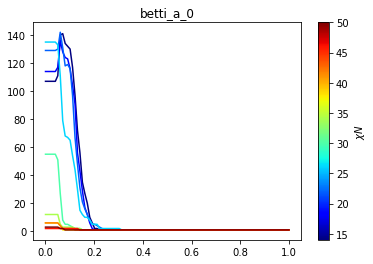

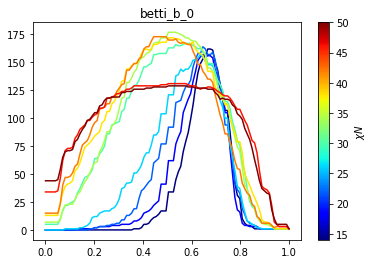

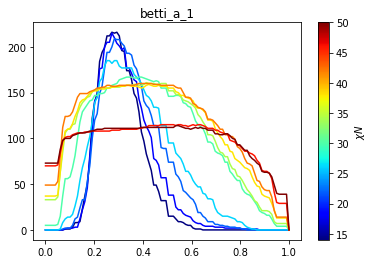

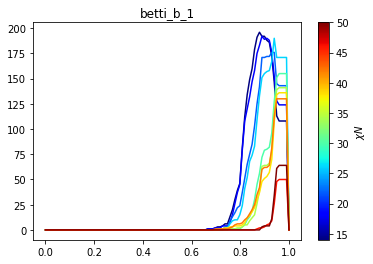

In [5]:
var = data["var"]

for i, key in enumerate(data.keys()):
    if "betti" in key:
        print(key)
        cmap = cm.jet
        size = len(data[key])
        norm = colors.Normalize(vmin=var[1], vmax=var[-1])
        plt.figure()
        for i in range(1, len(data[key])):
            plt.plot(np.linspace(0,1,100), data[key][i], color=cmap(norm(var[i])))
        plt.title(key)
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        plt.colorbar(sm, label=r"$\chi N$")

In [8]:
def l2_loss(curve, target):
    return np.sum(np.square(target-curve))

def l1_loss(curve, target):
    return np.sum(np.abs(target-curve))

betti_a_0
betti_b_0
betti_a_1
betti_b_1


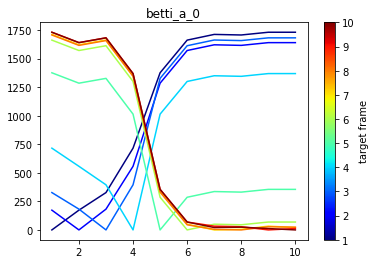

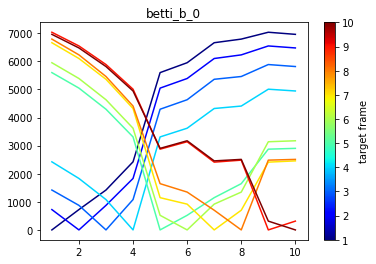

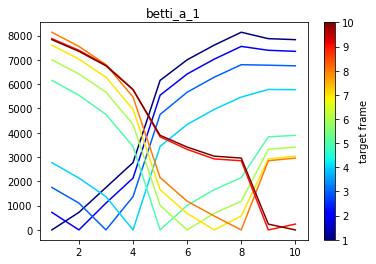

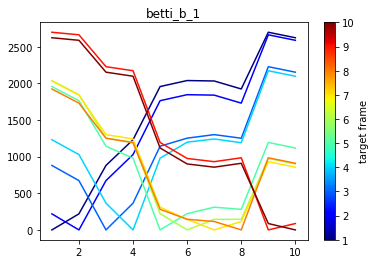

In [16]:
var = data["var"]

for i, key in enumerate(data.keys()):
    if "betti" in key:
        print(key)
        cmap = cm.jet
        size = len(data[key])
        norm = colors.Normalize(vmin=1, vmax=size-1)
        plt.figure()
        for i in range(1, size):
            l1 = []
            for j in range(1, size):
                    l1.append(l1_loss(data[key][j], data[key][i]))
            plt.plot(np.arange(1, size), l1, color=cmap(norm(i)))
        plt.title(key)
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        plt.colorbar(sm, label=r"target frame")

betti_a_0
betti_b_0
betti_a_1
betti_b_1


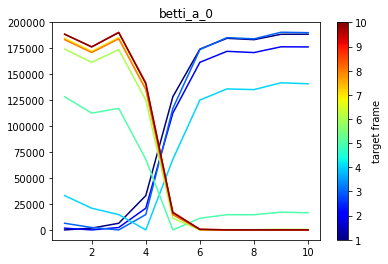

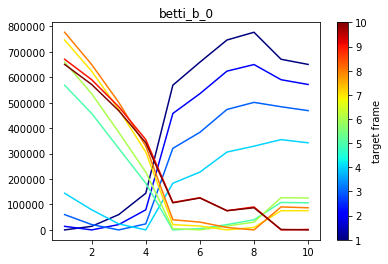

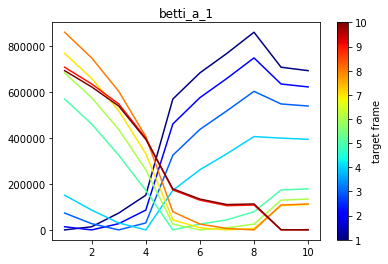

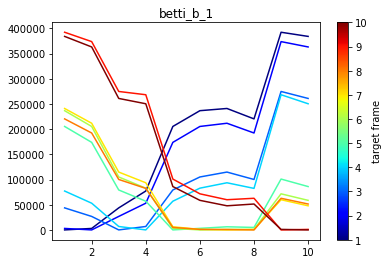

In [17]:
var = data["var"]

for i, key in enumerate(data.keys()):
    if "betti" in key:
        print(key)
        cmap = cm.jet
        size = len(data[key])
        norm = colors.Normalize(vmin=1, vmax=size-1)
        plt.figure()
        for i in range(1, size):
            l2 = []
            for j in range(1, size):
                    l2.append(l2_loss(data[key][j], data[key][i]))
            plt.plot(np.arange(1, size), l2, color=cmap(norm(i)))
        plt.title(key)
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        plt.colorbar(sm, label="target frame")

In [19]:
inputs = glob.glob(str(data_dir / "topolymer/processed/cubic_phom/r-5_l-10_frac-*"))

In [21]:
sorted(inputs)

['/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.20.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.30.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.40.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.50.npz']

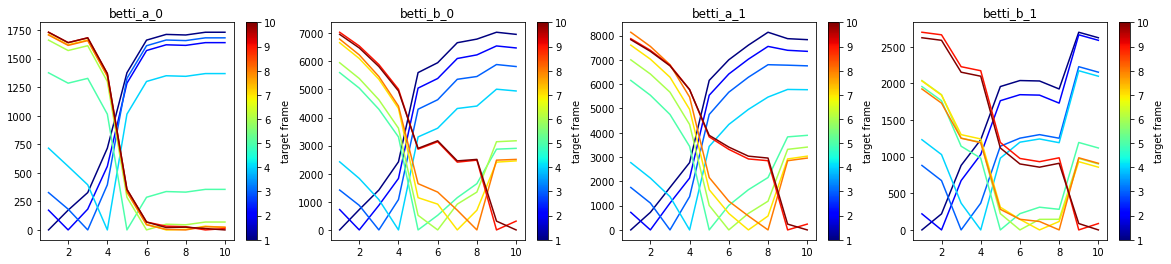

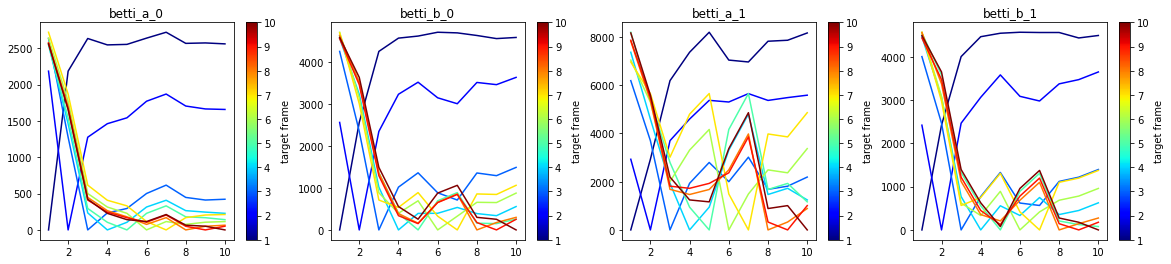

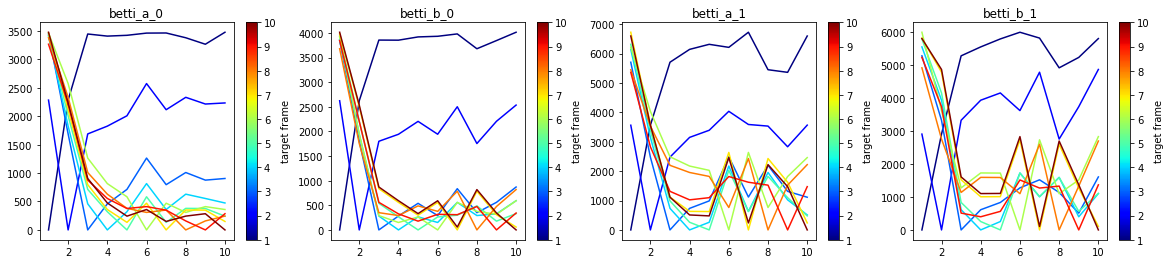

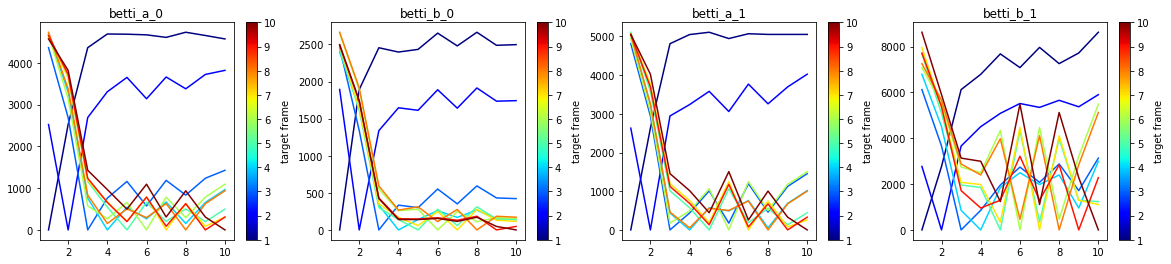

In [30]:
for dataset in sorted(inputs):
    data = np.load(dataset, allow_pickle=True)
    var = data["var"]

    fig, axs = plt.subplots(ncols=4, figsize=(20,4))
    jdx = 0
    for idx, key in enumerate(data.keys()):
        if "betti" in key:
            #print(key)
            cmap = cm.jet
            size = len(data[key])
            norm = colors.Normalize(vmin=1, vmax=size-1)
            plt.sca(ax=axs[jdx])
            for i in range(1, size):
                l2 = []
                for j in range(1, size):
                        l2.append(l1_loss(data[key][j], data[key][i]))
                plt.plot(np.arange(1, size), l2, color=cmap(norm(i)))
            plt.title(key)
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            plt.colorbar(sm, label="target frame")
            jdx += 1

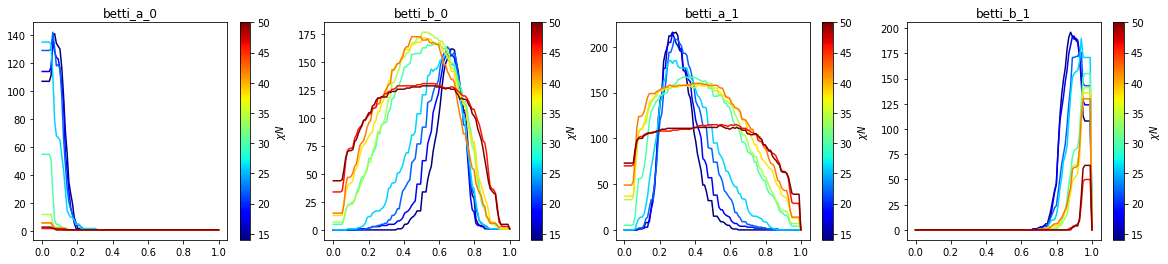

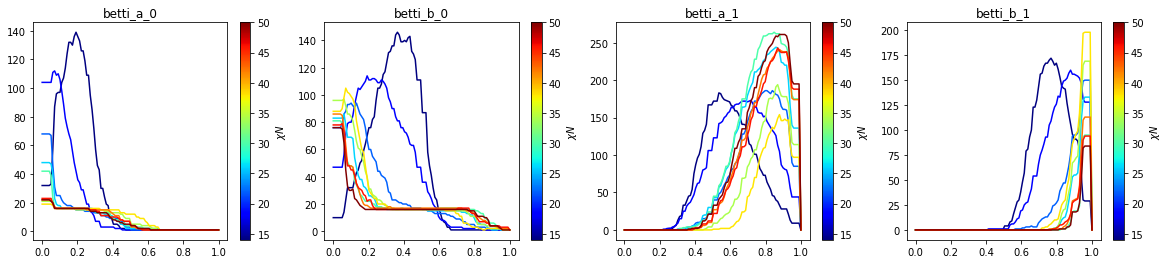

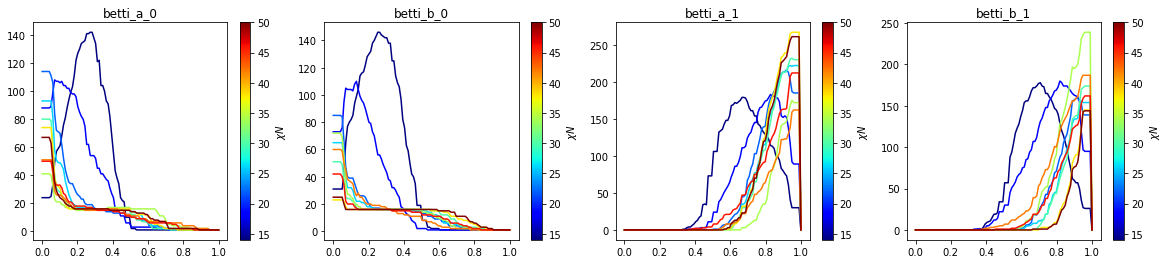

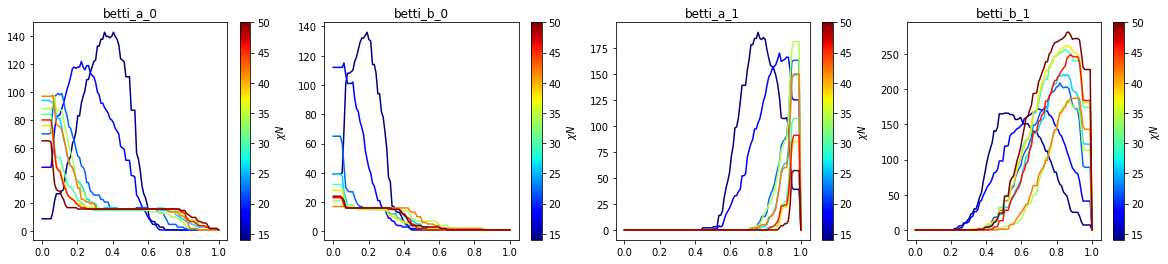

In [29]:
for dataset in sorted(inputs):
    data = np.load(dataset, allow_pickle=True)
    var = data["var"]

    fig, axs = plt.subplots(ncols=4, figsize=(20,4))
    jdx = 0
    for idx, key in enumerate(data.keys()):
        if "betti" in key:
            #print(key)
            cmap = cm.jet
            size = len(data[key])
            norm = colors.Normalize(vmin=var[1], vmax=var[-1])
            plt.sca(ax=axs[jdx])
            for i in range(1, len(data[key])):
                plt.plot(np.linspace(0,1,100), data[key][i], color=cmap(norm(var[i])))
            plt.title(key)
            sm = cm.ScalarMappable(cmap=cmap, norm=norm)
            plt.colorbar(sm, label=r"$\chi N$")
            jdx += 1

In [28]:
inputs

['/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.20.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.40.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.50.npz',
 '/home/ian/Documents/Data/topolymer/processed/cubic_phom/r-5_l-10_frac-0.30.npz']